# PCA Analysis

In [1]:
## Importing all the package
## Especially the package dataextract
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
import seaborn as sns
import sys
sys.path.insert(1, '../src')
from dataextract import data_pca_exploration

In [2]:
PATH_DATA='../data/'

## Get the data

In [3]:
df_raw=pd.read_csv(PATH_DATA+'winequality-red.csv')

In [4]:
df_raw.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
924,8.6,0.470,0.27,2.3,0.055,14.0,28.0,0.99516,3.18,0.80,11.2,5
565,12.7,0.600,0.49,2.8,0.075,5.0,19.0,0.99940,3.14,0.57,11.4,5
660,7.2,0.520,0.07,1.4,0.074,5.0,20.0,0.99730,3.32,0.81,9.6,6
174,7.3,0.380,0.21,2.0,0.080,7.0,35.0,0.99610,3.33,0.47,9.5,5
989,9.7,0.295,0.40,1.5,0.073,14.0,21.0,0.99556,3.14,0.51,10.9,6
37,8.1,0.380,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.7,7
1291,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9,6
115,9.4,0.400,0.31,2.2,0.090,13.0,62.0,0.99660,3.07,0.63,10.5,6
495,10.7,0.350,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
372,9.1,0.280,0.48,1.8,0.067,26.0,46.0,0.99670,3.32,1.04,10.6,6


In [5]:
df_raw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df_raw.shape

(1599, 12)

In [7]:
df_raw['wine_id']=[i+1 for i in range(len(df_raw))]

In [8]:
df_raw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,3
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,4
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,5


In [9]:
## Determine the Feature that will be focused on
pca_cols=df_raw.columns.tolist()
pca_cols=list(set(pca_cols)-set(['wine_id','quality']))

In [10]:
mod_info=data_pca_exploration(df_raw,pca_cols)

(1599, 11)


## outliers detect

In [11]:
outlier_detect=IsolationForest(n_estimators=300,
    contamination=0.03,
    max_features=0.9)

mod_info.outlier_label(outlier_detect,normalize=False)

fitting anomaly
done


In [12]:
mod_info.raw_data.head()

,density,free sulfur dioxide,sulphates,fixed acidity,residual sugar,total sulfur dioxide,pH,chlorides,citric acid,alcohol,volatile acidity,outliers
0,0.9978,11.0,0.56,7.4,1.9,34.0,3.51,0.076,0.00,9.4,0.70,1
1,0.9968,25.0,0.68,7.8,2.6,67.0,3.20,0.098,0.00,9.8,0.88,1
2,0.9970,15.0,0.65,7.8,2.3,54.0,3.26,0.092,0.04,9.8,0.76,1
3,0.9980,17.0,0.58,11.2,1.9,60.0,3.16,0.075,0.56,9.8,0.28,1
4,0.9978,11.0,0.56,7.4,1.9,34.0,3.51,0.076,0.00,9.4,0.70,1


## plain PCA

In [13]:
mod_info.pca_features(normalize=False,outliers=True)

In [15]:
mod_info.raw_data_pca.head(8)

,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11
0,-13.224905,-2.023900,-1.126821,-0.399233,-1.085389,-0.198018,0.031547,-0.147051,0.006047,0.008585,0.000262
1,22.037724,4.408322,-0.310378,-0.199938,-0.557109,-0.301325,0.223874,0.143165,-0.089312,-0.015483,0.000243
2,7.162673,-2.501461,-0.581868,-0.219069,-0.552934,-0.205114,0.136190,0.058480,-0.084793,-0.005749,0.000346
3,13.430063,-1.951122,2.634040,-1.574059,-0.063806,0.089092,-0.218923,-0.062244,0.006281,0.004586,-0.000747
4,-13.224905,-2.023900,-1.126821,-0.399233,-1.085389,-0.198018,0.031547,-0.147051,0.006047,0.008585,0.000262
5,-6.934000,-1.387902,-1.121277,-0.560100,-1.019868,-0.176887,0.011043,-0.162446,-0.011422,0.012344,0.000335
6,12.036828,-3.611776,-0.671637,-1.003903,-0.755059,-0.179256,-0.112541,-0.019718,-0.103342,0.007348,-0.000241
7,-25.042558,4.726072,-1.337817,-0.949577,-0.552435,-0.213952,-0.063820,-0.001867,-0.058626,0.002334,-0.001149


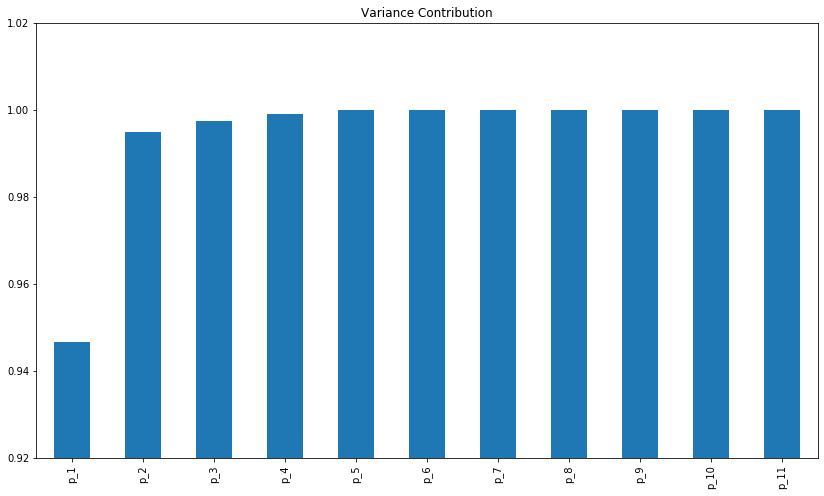

In [27]:
XX=mod_info.pca_component_contribution['Variance Contribution']
XX.index=mod_info.raw_data_pca.columns
# XX.plot(kind='bar',title='Variance Contribution',figsize = (14,8))
pd.Series.cumsum(XX).plot(kind='bar',title='Variance Contribution',figsize = (14,8),ylim=(0.92,1.02))

In [28]:
mod_info.raw_data[pca_cols].std().sort_values(ascending=False)

total sulfur dioxide    32.895324
free sulfur dioxide     10.460157
fixed acidity            1.741096
residual sugar           1.409928
alcohol                  1.065668
citric acid              0.194801
volatile acidity         0.179060
sulphates                0.169507
pH                       0.154386
chlorides                0.047065
density                  0.001887
dtype: float64

In [29]:
mod_info.df_features_quality

,quality
total sulfur dioxide,0.999936
free sulfur dioxide,0.999521
fixed acidity,0.024674
alcohol,0.015892
residual sugar,0.014099
pH,0.003283
citric acid,0.003040
volatile acidity,0.002046
sulphates,0.000658
chlorides,0.000245


In [30]:
mod_info.principle_infos

,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,quality
density,0.000004,-0.000025,0.000776,0.000055,-0.000834,-0.000467,0.001600,-0.004108,0.002839,0.002033,0.999983,0.000025
free sulfur dioxide,0.218857,0.975266,0.020897,-0.021189,-0.007868,-0.001060,-0.000093,0.002574,0.001499,-0.000318,0.000009,0.999521
sulphates,0.000223,0.000619,0.017525,-0.007199,0.023585,0.488427,0.853721,-0.132919,-0.053568,-0.105567,-0.001311,0.000658
fixed acidity,-0.006132,-0.023899,0.953136,-0.265092,0.098148,-0.079312,0.011142,-0.064907,-0.016206,0.011189,-0.000942,0.024674
residual sugar,0.008649,0.011135,0.280914,0.943178,-0.176627,0.005766,0.002495,-0.004134,-0.006931,-0.001486,-0.000413,0.014099
total sulfur dioxide,0.975678,-0.218917,-0.001527,-0.003980,0.010323,-0.000614,-0.000230,-0.001212,-0.000657,0.000260,-0.000003,0.999936
pH,-0.000268,0.003272,-0.058631,0.020578,0.012622,-0.142002,-0.010261,-0.859197,0.478788,0.090645,-0.005068,0.003283
chlorides,0.000064,-0.000237,0.002946,-0.000645,-0.009480,0.057016,0.113948,0.132518,0.072197,0.980249,-0.001819,0.000245
citric acid,0.000171,-0.003035,0.073708,-0.009832,0.041482,0.504044,-0.205508,0.327123,0.760466,-0.105489,-0.000058,0.003040
alcohol,-0.006358,0.014564,-0.048599,0.197614,0.977129,-0.050825,0.008250,0.021779,-0.018024,0.010112,0.000925,0.015892


In [31]:
mod_info.get_best_quality_feature(correlation_benchmark=0.85)

In [32]:
mod_info.Best_Features_Quality

['free sulfur dioxide', 'total sulfur dioxide']

In [33]:
mod_info.corr_mat

,total sulfur dioxide,free sulfur dioxide
total sulfur dioxide,1.000000,0.445778
free sulfur dioxide,0.445778,1.000000


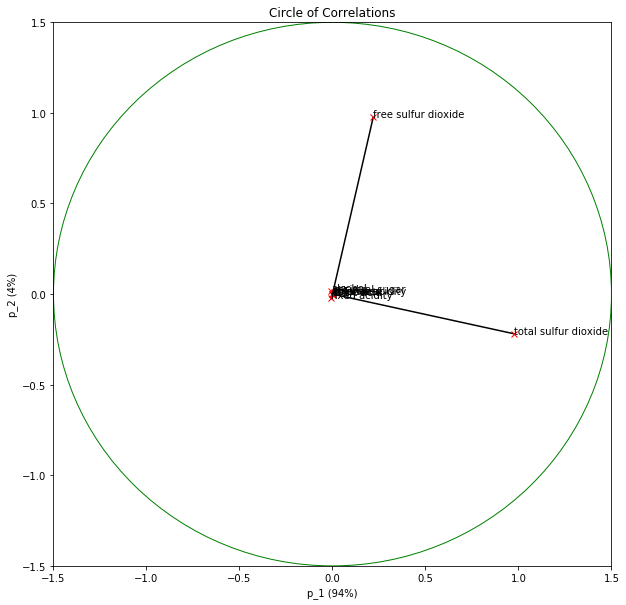

In [34]:
mod_info.coc_plot(rad=1.5,annot=True)

## plain PCA without outliers

In [35]:
# mod_info.pca_features(normalize=False,outliers=Fal)

## Standardized PCA

Standardized with outliers

In [72]:
mod_info.pca_features(normalize=True,outliers=False)

In [73]:
mod_info.normalize_data[pca_cols].std().sort_values(ascending=False)

chlorides               1.369190
residual sugar          1.206716
sulphates               1.173635
free sulfur dioxide     1.068881
total sulfur dioxide    1.068719
density                 1.056363
pH                      1.052620
fixed acidity           1.034662
alcohol                 1.024547
citric acid             1.021704
volatile acidity        1.004512
dtype: float64

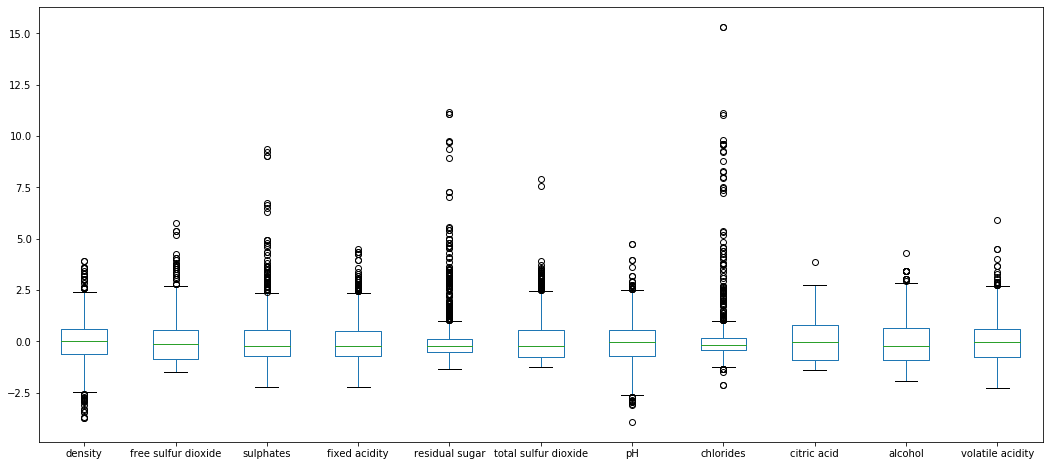

In [74]:
mod_info.normalize_data[pca_cols].plot(kind='box', figsize=(18,8))

In [75]:
# mod_info.normalize_data[mod_info.normalize_data.outliers==1][pca_cols].plot(kind='box', figsize=(18,8))

In [76]:
mod_info.df_features_quality

,quality
total sulfur dioxide,0.525282
density,0.514160
fixed acidity,0.510853
alcohol,0.506777
citric acid,0.496451
pH,0.432594
volatile acidity,0.417754
free sulfur dioxide,0.408591
sulphates,0.269331
chlorides,0.224989


In [77]:
# mod_info.principle_infos

In [78]:
# mod_info.get_best_quality_feature(correlation_benchmark=0.85)
mod_info.get_best_quality_feature(correlation_benchmark=0.85,top_benchmark=0.42)

In [79]:
mod_info.Best_Features_Quality

['fixed acidity',
 'density',
 'total sulfur dioxide',
 'pH',
 'citric acid',
 'alcohol']

In [80]:
mod_info.corr_mat

,total sulfur dioxide,density,fixed acidity,alcohol,citric acid,pH
total sulfur dioxide,1.000000,0.005079,0.012810,0.042294,0.001263,0.004422
density,0.005079,1.000000,0.446287,0.246194,0.133186,0.116758
fixed acidity,0.012810,0.446287,1.000000,0.003803,0.451186,0.466459
alcohol,0.042294,0.246194,0.003803,1.000000,0.012079,0.042285
citric acid,0.001263,0.133186,0.451186,0.012079,1.000000,0.293660
pH,0.004422,0.116758,0.466459,0.042285,0.293660,1.000000


In [81]:
mod_info.Best_Features_Quality

['fixed acidity',
 'density',
 'total sulfur dioxide',
 'pH',
 'citric acid',
 'alcohol']

In [82]:
mod_info.corr_mat

,total sulfur dioxide,density,fixed acidity,alcohol,citric acid,pH
total sulfur dioxide,1.000000,0.005079,0.012810,0.042294,0.001263,0.004422
density,0.005079,1.000000,0.446287,0.246194,0.133186,0.116758
fixed acidity,0.012810,0.446287,1.000000,0.003803,0.451186,0.466459
alcohol,0.042294,0.246194,0.003803,1.000000,0.012079,0.042285
citric acid,0.001263,0.133186,0.451186,0.012079,1.000000,0.293660
pH,0.004422,0.116758,0.466459,0.042285,0.293660,1.000000


In [83]:
mod_info.Best_Features_Quality

['fixed acidity',
 'density',
 'total sulfur dioxide',
 'pH',
 'citric acid',
 'alcohol']

In [84]:
mod_info.corr_mat

,total sulfur dioxide,density,fixed acidity,alcohol,citric acid,pH
total sulfur dioxide,1.000000,0.005079,0.012810,0.042294,0.001263,0.004422
density,0.005079,1.000000,0.446287,0.246194,0.133186,0.116758
fixed acidity,0.012810,0.446287,1.000000,0.003803,0.451186,0.466459
alcohol,0.042294,0.246194,0.003803,1.000000,0.012079,0.042285
citric acid,0.001263,0.133186,0.451186,0.012079,1.000000,0.293660
pH,0.004422,0.116758,0.466459,0.042285,0.293660,1.000000


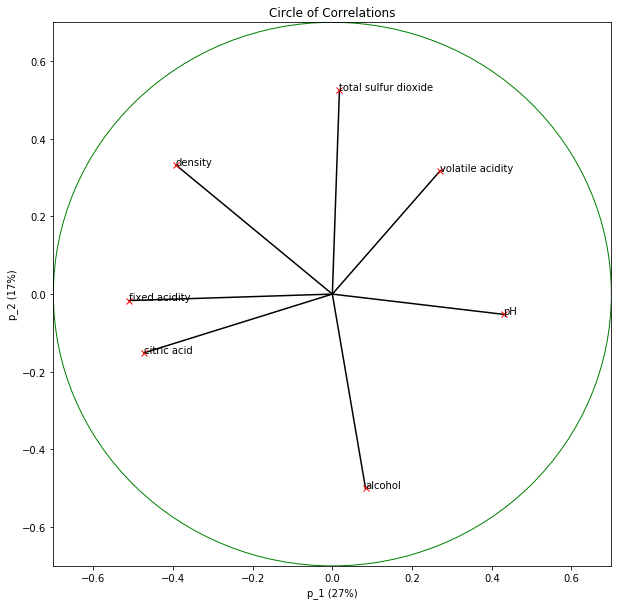

In [85]:
mod_info.coc_plot(rad=0.7,annot=True,top_quality=7)

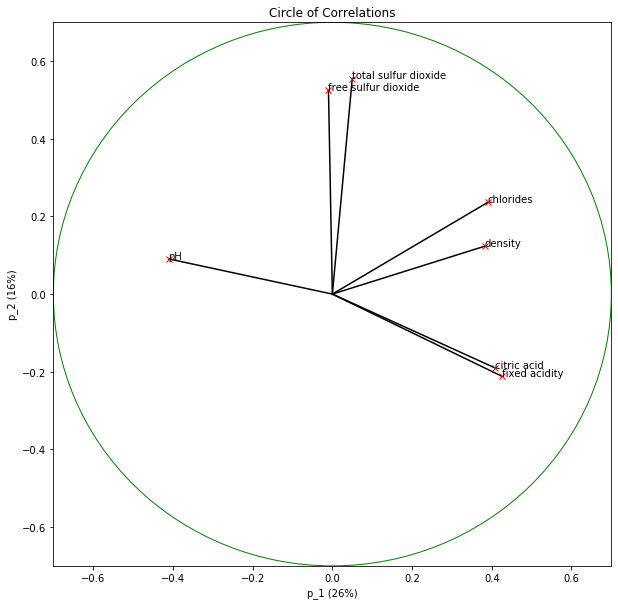

In [51]:
mod_info.coc_plot(rad=0.7,annot=True,top_quality=7)

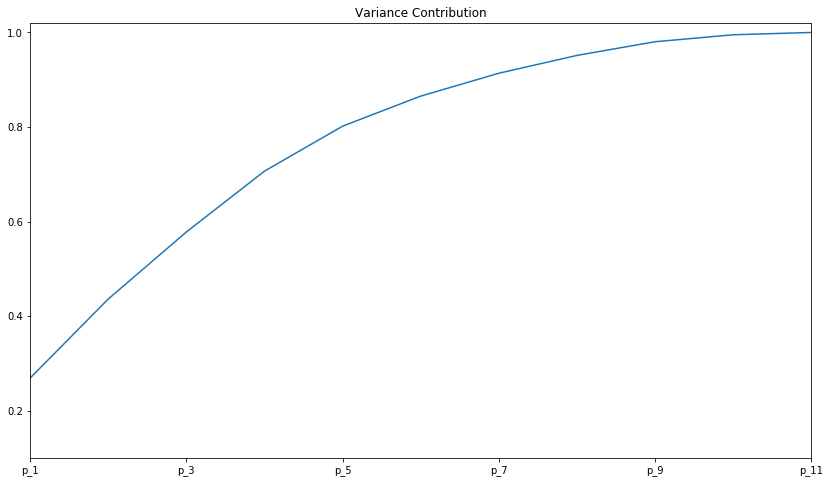

In [56]:
XX=mod_info.pca_component_contribution['Variance Contribution']
XX.index=mod_info.raw_data_pca.columns
# XX.plot(kind='bar',title='Variance Contribution',figsize = (14,8))
pd.Series.cumsum(XX).plot(kind='line',title='Variance Contribution',figsize = (14,8),ylim=(0.1,1.02))

## Standardized PCA without outliers

Standardized without outliers